# News, Trust, and Data Access

## Analysis

Here we will examine the dataset to attempt to answer the following questions:

1. Are there any statistically significant differences between demographic groups with regard to trusting online news reporting?
2. What news outlets are most trusted? And by whom?

### Setup

The following cells import and organize the dataset into a pandas DataFrame.

In [24]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from wrangle import set_categories

# Set plt style
plt.style.use('seaborn-v0_8')

# Import the cleaned dataset
survey_tidy = pd.read_csv('data/news_trust_data__clean.csv')

# Create a shorter DataFrame without the NewsSource and Source Trust columns (i.e. no duplicate RespondentID entries for different NewsSources)
survey_short = survey_tidy[survey_tidy['NewsSource'] == 'NYT'].drop(columns=['NewsSource', 'SourceTrust'])

# Set categorical values and their order in dataframes
set_categories([survey_tidy, survey_short])

# Check shape and head of datasets
print(survey_short.shape)
display(survey_short.head())

print(survey_tidy.shape)
display(survey_tidy.head())

(1021, 8)


,RespondentID,Political_View,General_Trust,Pay_For_News,Data_Access,Age,Gender,Income
0,6176264298,Moderate,Fair amount,No,NaN,30-44,Male,"10,000-24,999"
1,6176263960,Moderate,Fair amount,No,Increase Trust,18-29,Female,"0-9,999"
2,6176258621,Liberal,Fair amount,Yes,Increase Trust,30-44,Male,"125,000-149,999"
3,6176257082,Liberal,Fair amount,No,Increase Trust,18-29,Male,"125,000-149,999"
4,6176256111,Liberal,Fair amount,Yes,NaN,30-44,Male,"10,000-24,999"


(11231, 10)


,RespondentID,Political_View,General_Trust,Pay_For_News,Data_Access,Age,Gender,Income,NewsSource,SourceTrust
0,6176264298,Moderate,Fair amount,No,NaN,30-44,Male,"10,000-24,999",NYT,1
1,6176263960,Moderate,Fair amount,No,Increase Trust,18-29,Female,"0-9,999",NYT,1
2,6176258621,Liberal,Fair amount,Yes,Increase Trust,30-44,Male,"125,000-149,999",NYT,1
3,6176257082,Liberal,Fair amount,No,Increase Trust,18-29,Male,"125,000-149,999",NYT,0
4,6176256111,Liberal,Fair amount,Yes,NaN,30-44,Male,"10,000-24,999",NYT,1


## How does trust of the press differ between various demographics?

First, we will look at the overall survey results of trust in online news reporting.

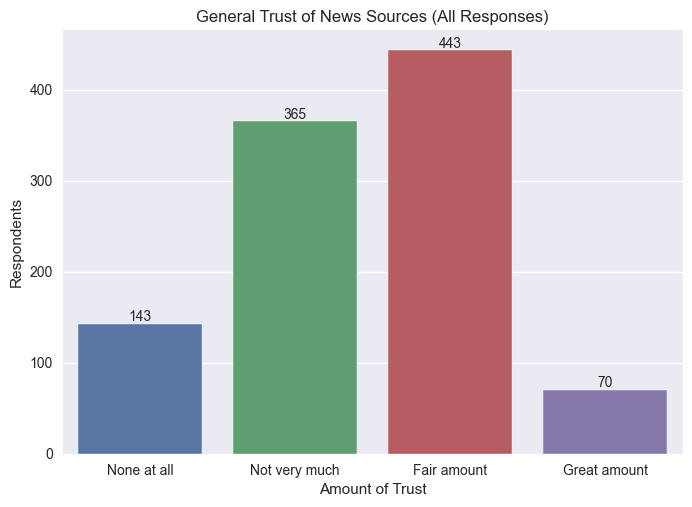

In [3]:
# Plot the LoT across all survey respondents
tot_trust = sns.countplot(x='General_Trust', data=survey_short)
tot_trust.set(title='General Trust of News Sources (All Responses)', xlabel='Amount of Trust', ylabel='Respondents')
tot_trust.bar_label(tot_trust.containers[0])
tot_trust;

Now that we have a general baseline of the survey results, we will look for statistically significant correlations at the $\alpha = 0.05$ significance level between General_Trust and various demographics by running Chi-Squared tests for each of the following groups:
* Age
* Gender
* Income
* Political viewpoint
* Pays for news source

In [4]:
# Generate and print p-values for each wanted feature
for f in ['Age', 'Gender', 'Pay_For_News', 'Income', 'Political_View']:
    chi, p_val, dof, exp = chi2_contingency(pd.crosstab(survey_short['General_Trust'], survey_short[f]))
    print('Feature:', f)
    print('P-value:', p_val, '\n')

Feature: Age
P-value: 0.24346125475628522 

Feature: Gender
P-value: 0.010393627100667265 

Feature: Pay_For_News
P-value: 0.00033200822288023175 

Feature: Income
P-value: 0.38176754417554915 

Feature: Political_View
P-value: 2.0563009722213817e-23 



Our tests have found that the features of gender, political leaning, and paying for a news source all have statistically significant relationships to general trust in the press. The features of Age and Income can be safely ignored for this specific line of inquiry.

Let's start looking deeper by examining the relationship between reporting trust and gender.

#### Gender and Trust

Gender Breakdown:
Female    0.561214
Male      0.438786
Name: Gender, dtype: float64


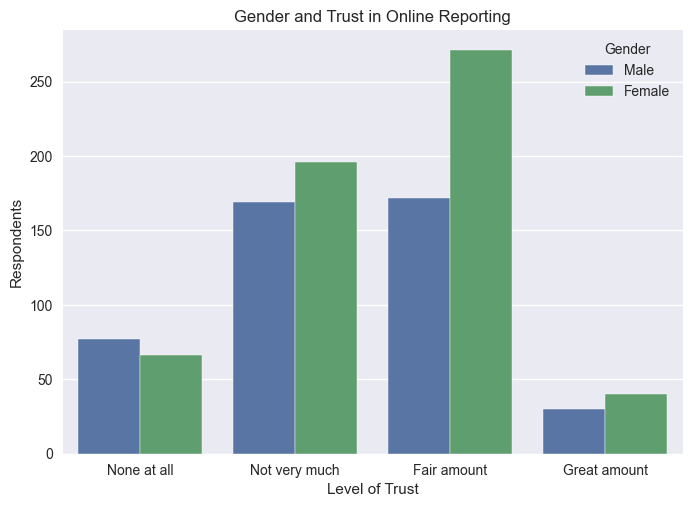

In [5]:
# How gender affects trust
print('Gender Breakdown:')
print(survey_short['Gender'].value_counts(normalize=True))

gender_trust = sns.countplot(x='General_Trust', hue='Gender', data=survey_short)
gender_trust.set(title='Gender and Trust in Online Reporting', xlabel='Level of Trust', ylabel='Respondents')
gender_trust;

From the above bar graph, it appears that women are more trusting of online news reporting relative to men, who are more likely to have no trust at all.

#### Paying for News and Trust

No     0.799216
Yes    0.200784
Name: Pay_For_News, dtype: float64


General_Trust,None at all,Not very much,Fair amount,Great amount
Pay_For_News,,,,
No,0.846154,0.835616,0.781038,0.628571
Yes,0.153846,0.164384,0.218962,0.371429


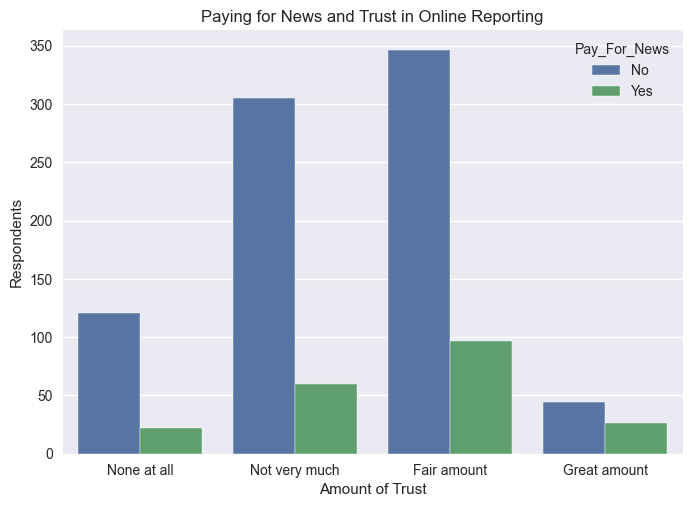

In [6]:
# How paying for a news source affects trust
print(survey_short['Pay_For_News'].value_counts(normalize=True))

display(pd.crosstab(survey_short['Pay_For_News'], survey_short['General_Trust'], normalize='columns'))

pay_trust_heat = sns.countplot(x='General_Trust', hue='Pay_For_News', data=survey_short)
pay_trust_heat.set(title='Paying for News and Trust in Online Reporting', xlabel='Amount of Trust', ylabel='Respondents')
pay_trust_heat;

Those who paid for access to online news, while only making up 20% of those surveyed, accounted for 37% of those who indicated "Great Amount" of trust in news reporting.

#### Political View and Trust

Very Liberal         0.108717
Liberal              0.215475
Moderate             0.411361
Conservative         0.210578
Very Conservative    0.053869
Name: Political_View, dtype: float64


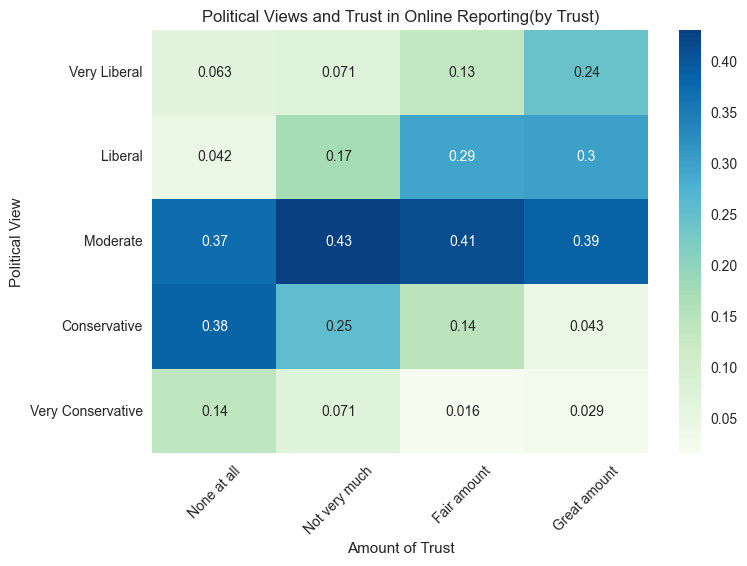

In [7]:
# Breakdown each political leaning by LoT (shading denotes % of political faction with given LoT)
print(survey_short['Political_View'].value_counts(normalize=True).sort_index())

pol_trust_heat = sns.heatmap(pd.crosstab(survey_short['Political_View'], survey_short['General_Trust'], normalize='columns'), cmap='GnBu', annot=True)
pol_trust_heat.set(title='Political Views and Trust in Online Reporting(by Trust)', xlabel='Amount of Trust', ylabel='Political View')
plt.xticks(rotation=45)
pol_trust_heat;

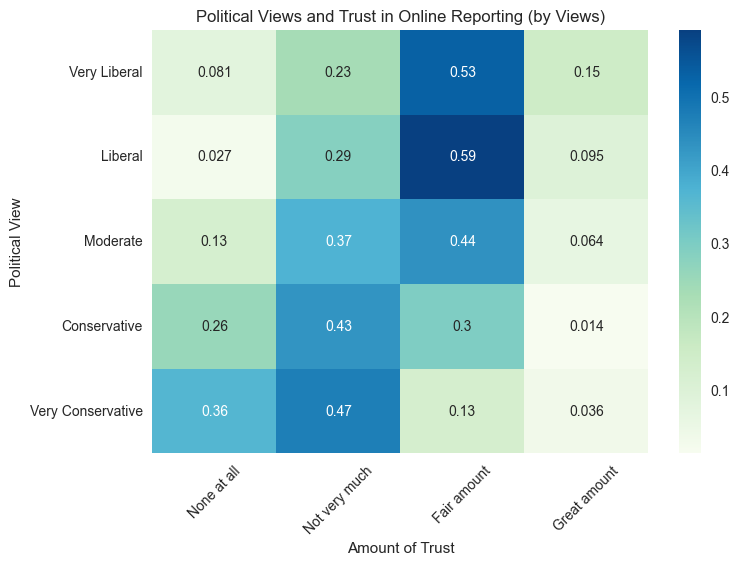

In [8]:
pol_trust_heat = sns.heatmap(pd.crosstab(survey_short['Political_View'], survey_short['General_Trust'], normalize='index'), cmap='GnBu', annot=True)
pol_trust_heat.set(title='Political Views and Trust in Online Reporting (by Views)', xlabel='Amount of Trust', ylabel='Political View')
plt.xticks(rotation=45)
pol_trust_heat;

After breaking down the data by political views, we can see that there is a trend of increasing trust as we move from the right to left of the political spectrum. Those who reported a 'Fair Amount' of trust were disproportionately Liberal or Very Liberal, and an even greater discrepancy among those with a 'Great Amount' of trust. Looking at the 'Not very much' and 'None at all' levels of trust, we see a very similar pattern in the opposite direction (disproportionately Conservative or Very Conservative).

Of all those surveyed that reported a 'Great Amount' of trust in news reporting, 54% self identified as being on the left side of the political spectrum (30% Liberal, 24% Very Liberal). Compared to 39% identifying as moderates and less than 8% as right of center. For context, only 32% of all respondents identified as being left leaning, 41% as moderate, and 26% as right leaning.

## Individual News Sources

For our second line of inquiry, we will be examining how those surveyed trust 11 specific online news outlets.

Let us again start with a general overview of trust in each outlet.

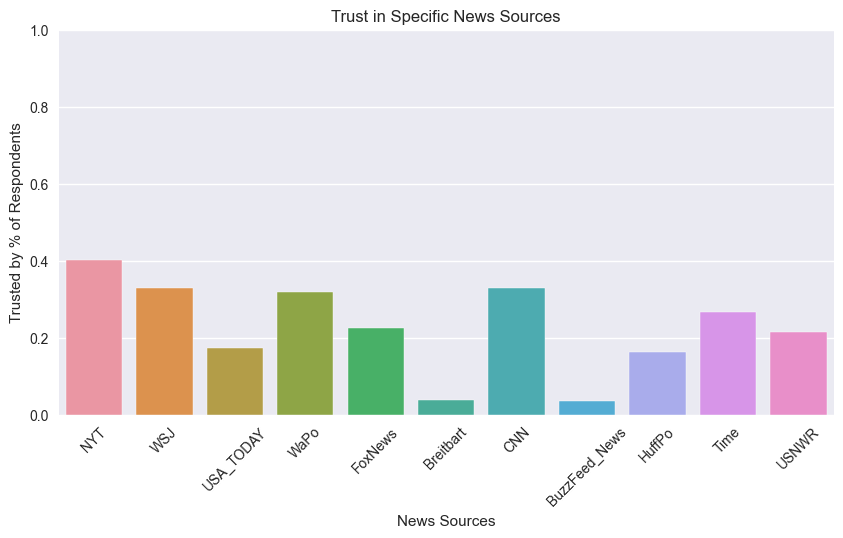

In [22]:
# Trust in individual news sources
plt.figure(figsize=(10,5))
plt.ylim((0, 1))
plt.xticks(rotation=45)
src_plot = sns.barplot(x=survey_tidy['NewsSource'], y=survey_tidy['SourceTrust'], errorbar=None)
src_plot.set(title='Trust in Specific News Sources', xlabel='News Sources', ylabel='Trusted by % of Respondents')
src_plot;

In [10]:
# Percentages sorted by most trusted
pd.crosstab(survey_tidy['NewsSource'], survey_tidy['SourceTrust'], normalize='index')[1].sort_values(ascending=False)

NewsSource
NYT              0.401567
WSJ              0.330069
CNN              0.329089
WaPo             0.318315
Time             0.265426
FoxNews          0.224290
USNWR            0.213516
USA_TODAY        0.173359
HuffPo           0.162586
Breitbart        0.037218
BuzzFeed_News    0.034280
Name: 1, dtype: float64

We see that no outlet is trusted by a majority of those surveyed. In fact, the most trusted online news outlet according to our data is the New York Times, at 40%. Four of the top five most trusted outlets are long-standing traditional news outlets that had been in print for decades prior to their online presence (NYT, WSJ, Washington Post, Time). The fifth being the oldest 24/7 cable news network (CNN) at \#2.

On the bottom end of the list are Breitbart and BuzzFeed News, each with less than 4% of respondents indicating trust in their reporting. This is nearly 13 percentage points less than the next least trusted source, the Huffington Post.


In [11]:
# Generate and print p-values for each wanted feature
for f in ['Age', 'Gender', 'Pay_For_News', 'Income', 'Political_View', 'General_Trust']:
    p_val = chi2_contingency(pd.crosstab(survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], survey_tidy[f]))[1]
    print('Feature:', f)
    print('P-value:', p_val, '\n')

Feature: Age
P-value: 0.0002850191392643083 

Feature: Gender
P-value: 2.8837554555254922e-08 

Feature: Pay_For_News
P-value: 1.0162304411743166e-05 

Feature: Income
P-value: 0.6016731681801519 

Feature: Political_View
P-value: 3.346987033845855e-98 

Feature: General_Trust
P-value: 1.1914371470488904e-61 



Age, gender, political view, paying for news, and general trust level have shown statistically significant associations at the $\alpha = 0.05$ level.

#### Age and New Sources

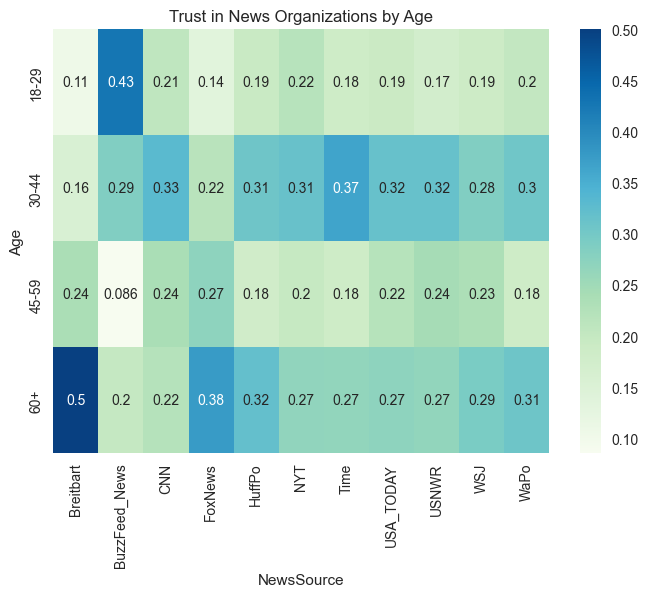

In [12]:
age_src_cross = pd.crosstab(survey_tidy['Age'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
plt.title('Trust in News Organizations by Age')
sns.heatmap(age_src_cross, cmap='GnBu', annot=True);

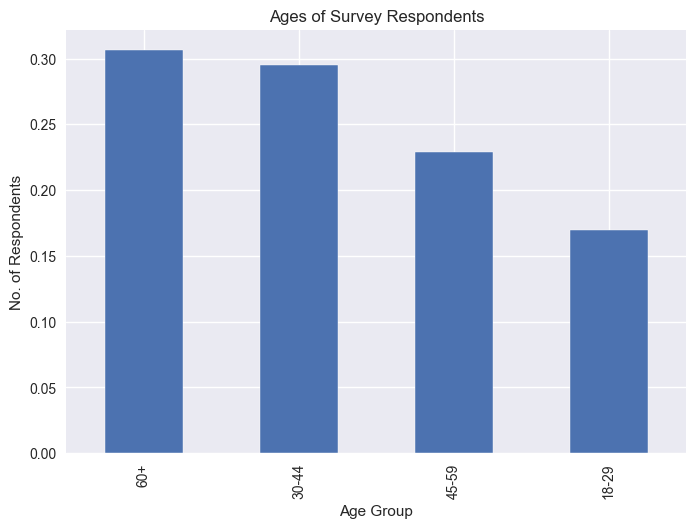

In [13]:
# Show breakdown of ages across all respondents
plt.title("Ages of Survey Respondents")
plt.xlabel("Age Group")
plt.ylabel("No. of Respondents")
survey_short['Age'].value_counts(normalize=True).plot(kind='bar');

While the vast majority of online news outlets readerships follow our survey's age breakdown, we see that Brietbart (and to a lesser extent, Fox News) is heavily skewed towards the older age groups. Half of those who indicated a trust in Brietbart's reporting are 60+, and another 24% in the 45-59 age group. Fox News follows a similar, but less dramatic, skew towards the older groups.

In contrast, 43% of those who trust Buzzfeed News are in the youngest age group, and 72% being under the age of 45.

#### Gender and New Sources

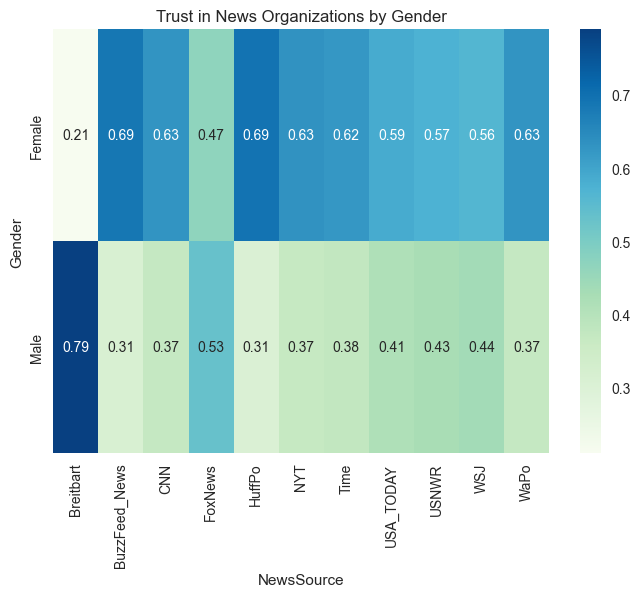

In [14]:
gender_src_cross = pd.crosstab(survey_tidy['Gender'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
plt.title("Trust in News Organizations by Gender")
sns.heatmap(gender_src_cross, cmap='GnBu', annot=True);

In [15]:
print(survey_short['Gender'].value_counts(normalize=True))

Female    0.561214
Male      0.438786
Name: Gender, dtype: float64


When broken down by gender, we will notice the same two outlets (Breitbart and Fox News) sticking out from the crowd.

The 9 other outlets roughly follow the sample gender breakdown (56% women to 44% men), whereas those trusting Breitbart and Fox News are overwhelmingly male.

In the case of Breitbart, nearly 4 men reported trust in their reporting for every 1 woman who also did so.

#### Political Views and News Source

Very Liberal         0.108717
Liberal              0.215475
Moderate             0.411361
Conservative         0.210578
Very Conservative    0.053869
Name: Political_View, dtype: float64


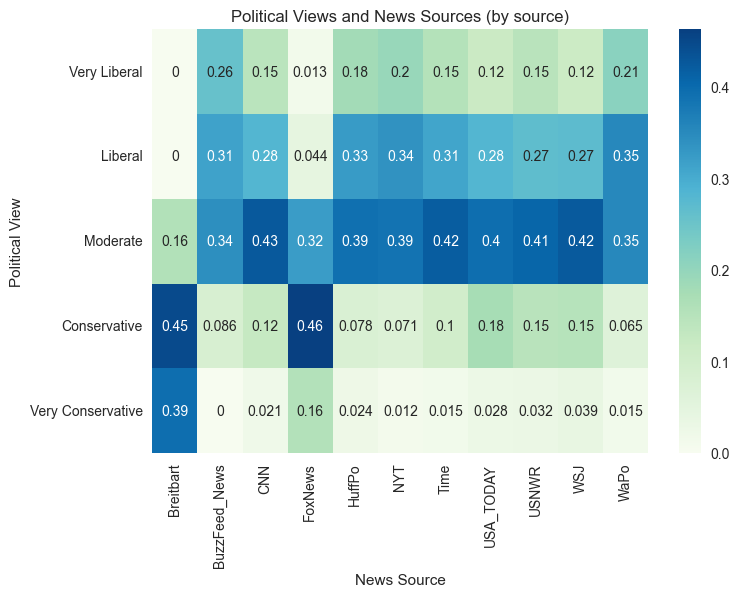

In [16]:
print(survey_short['Political_View'].value_counts(normalize=True).sort_index())

pol_src_cross = pd.crosstab(survey_tidy['Political_View'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
pol_src_heat = sns.heatmap(pol_src_cross, cmap='GnBu', annot=True)
pol_src_heat.set(title='Political Views and News Sources (by source)', xlabel='News Source', ylabel='Political View')
pol_src_heat;

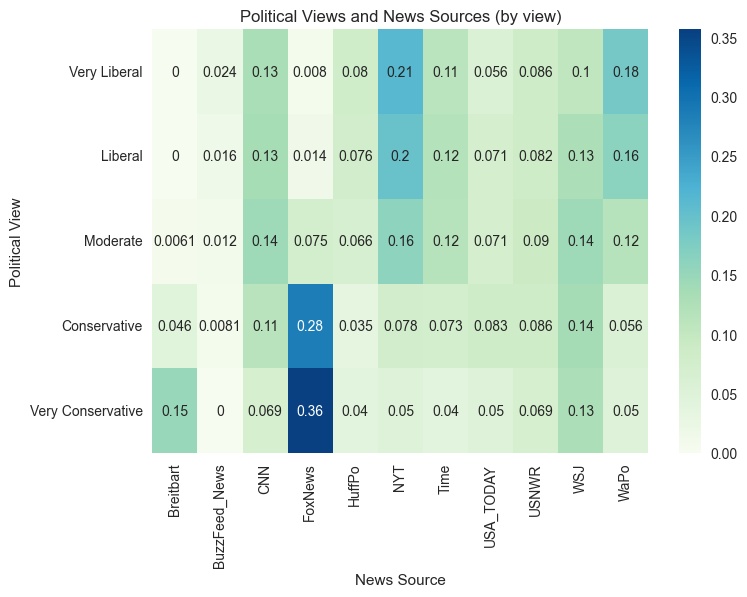

In [17]:
pol_src_cross = pd.crosstab(survey_tidy['Political_View'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='index')
pol_src_heat = sns.heatmap(pol_src_cross, cmap='GnBu', annot=True)
pol_src_heat.set(title='Political Views and News Sources (by view)', xlabel='News Source', ylabel='Political View')
pol_src_heat;

Breitbart and Fox News are again showing very different breakdowns than the sample breakdown of political views.

Those who trust Breitbart are tending to be overwhelmingly older (45+), male, and right of center. Those who trust Fox News follow the same pattern, but to a lesser extent.

The opposite is again true for Buzzfeed News, with over 90% of those reporting trust in their reporting identifying as moderate or left of center.

#### General Amount of Trust and Individual News Sources

None at all      0.140059
Not very much    0.357493
Fair amount      0.433888
Great amount     0.068560
Name: General_Trust, dtype: float64


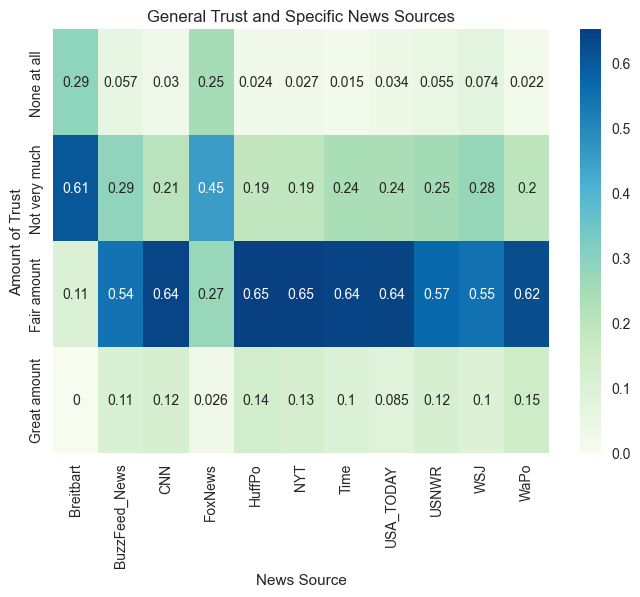

In [18]:
print(survey_short['General_Trust'].value_counts(normalize=True).sort_index())

gen_src_cross = pd.crosstab(survey_tidy['General_Trust'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
trust_src = sns.heatmap(gen_src_cross, cmap='GnBu', annot=True)
trust_src.set(title='General Trust and Specific News Sources', xlabel='News Source', ylabel='Amount of Trust')
trust_src;

From these breakdowns by four different demographics, we are seeing a pattern of Breitbart and Fox News breaking the mold of the sample demographics and that of the other online news outlets.

Those who trust Breitbart and/or Fox News are disproportionately older (45+), male, right of center, and more distrustful of the news than we would expect from the sample.

### A closer look at the demographics

Let's look closer at how some of these demographics intersect (or don't).

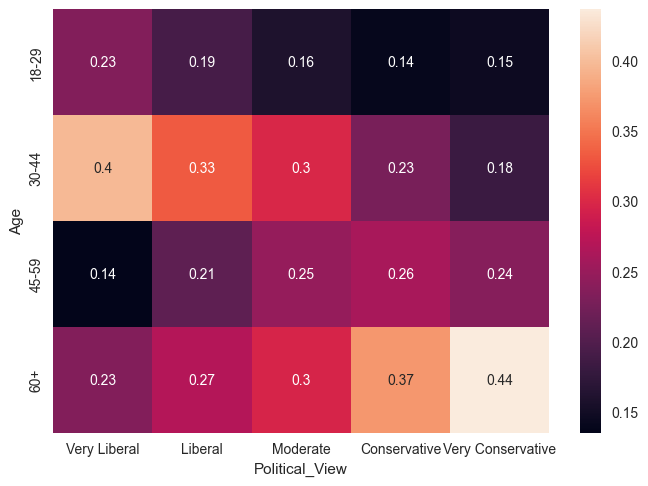

In [19]:
sns.heatmap(pd.crosstab(survey_short['Age'], survey_short['Political_View'], normalize='columns'), annot=True);

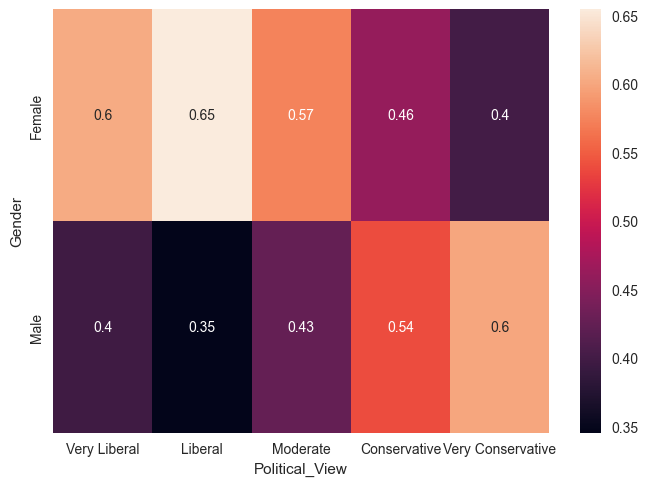

In [20]:
sns.heatmap(pd.crosstab(survey_short['Gender'], survey_short['Political_View'], normalize='columns'), annot=True);

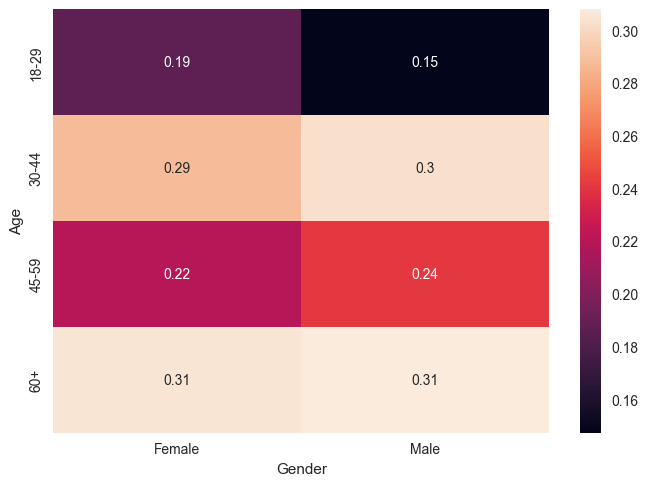

In [21]:
sns.heatmap(pd.crosstab(survey_short['Age'], survey_short['Gender'], normalize='columns'), annot=True);

From the heatmaps above, we see an intersection of our demographics disproportionately represented among those trusting Breitbart and Fox News. Among the people surveyed, those who are Conservative or Very Conservative tend to be older men.

This particular group is the most likely to trust the online reporting of Breitbart and/or Fox News.